# 課題

Sobelフィルタを実装しよう

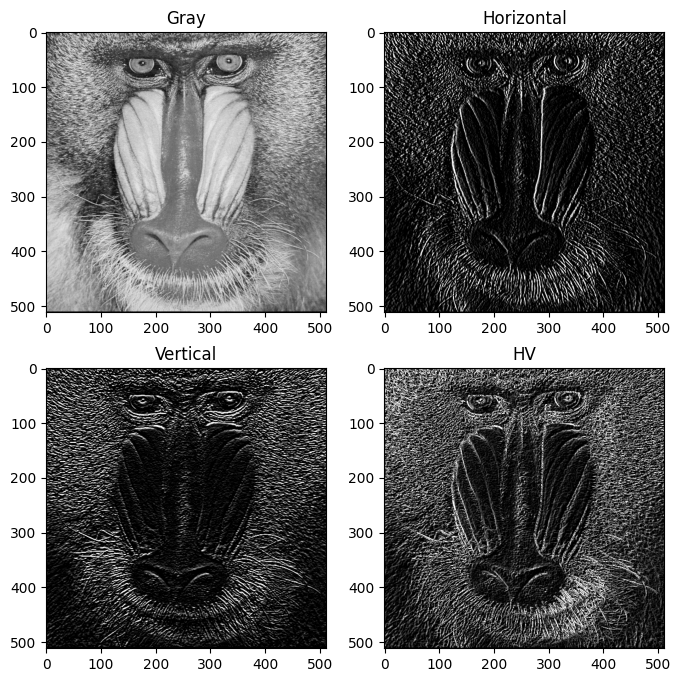

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

def rgb2gray(img: np.ndarray):
    "RGB画像をグレースケールに変換する関数"
    r = img[:, :, 0].copy()
    g = img[:, :, 1].copy()
    b = img[:, :, 2].copy()
    y = 0.2126 * r + 0.7152 * g + 0.0722 * b
    return y.astype(np.uint8)

def sobel_filter(img: np.ndarray, kernel_size: int = 3):
    "Sobelフィルタを適用する関数"
    H, W = img.shape

    # ゼロ埋め
    pad = kernel_size // 2
    out = np.zeros((H + pad * 2, W + pad * 2), dtype=np.float32)
    out[pad: pad + H, pad: pad + W] = img.copy().astype(np.float32)

    out_v = out.copy()
    out_h = out.copy()

    # カーネル
    kernel_v = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float32)
    kernel_h = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)

    # フィルタリング
    for y in range(H):
        for x in range(W):
            out_v[pad + y, pad + x] = np.sum(kernel_v * out[y: y + kernel_size, x: x + kernel_size])
            out_h[pad + y, pad + x] = np.sum(kernel_h * out[y: y + kernel_size, x: x + kernel_size])

    out_v = np.clip(out_v, 0, 255)
    out_h = np.clip(out_h, 0, 255)

    out_v = out_v[pad: pad + H, pad: pad + W].astype(np.uint8)
    out_h = out_h[pad: pad + H, pad: pad + W].astype(np.uint8)

    return out_v, out_h

img = io.imread("imgs/baboon.png")

img_gray = rgb2gray(img)
plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.title('Gray')
plt.imshow(img_gray, cmap="gray")

img_vertical, img_horizontal = sobel_filter(img_gray)
plt.subplot(2, 2, 3)
plt.title('Vertical')
plt.imshow(img_vertical, cmap="gray")
plt.subplot(2, 2, 2)
plt.title('Horizontal')
plt.imshow(img_horizontal, cmap="gray")

img_hv = (img_vertical + img_horizontal) / 2
plt.subplot(2, 2, 4)
plt.title('HV')
plt.imshow(img_hv, cmap="gray")